In [1]:
#importing data analysis and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
"%matpotlib inline"
sns.set()

In [2]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing and reading CSV file
seoul_bike_data = pd.read_csv(r"D:\Python\Codes\Alma Better Practice and Projects\Machine Learning\Data\SeoulBikeData.csv", encoding='latin1')

In [4]:
seoul_bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
seoul_bike_data.shape

(8760, 14)

In [6]:
seoul_bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
seoul_bike_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [8]:
continuous_variables = seoul_bike_data.select_dtypes(exclude='object')
categorical_variables = seoul_bike_data.select_dtypes(include='object')

In [9]:
continuous_variables

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [10]:
categorical_variables

,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes
...,...,...,...,...
8755,30/11/2018,Autumn,No Holiday,Yes
8756,30/11/2018,Autumn,No Holiday,Yes
8757,30/11/2018,Autumn,No Holiday,Yes
8758,30/11/2018,Autumn,No Holiday,Yes


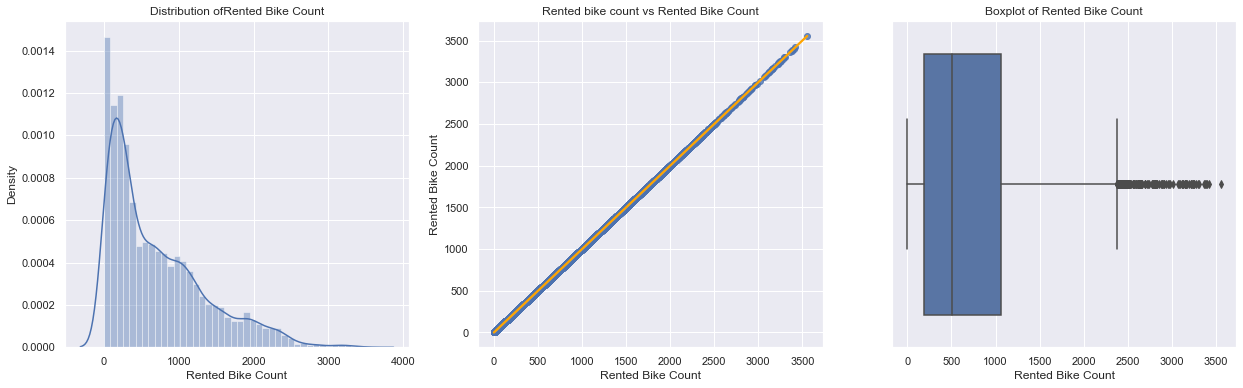

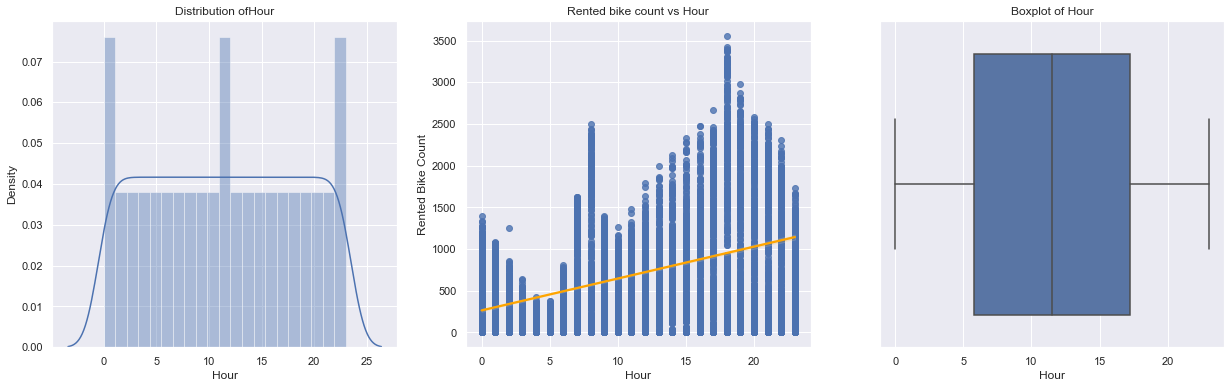

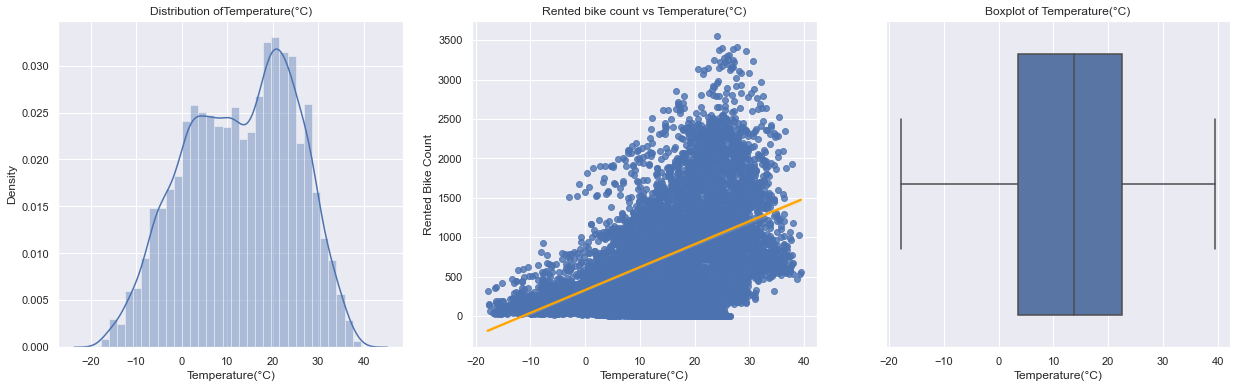

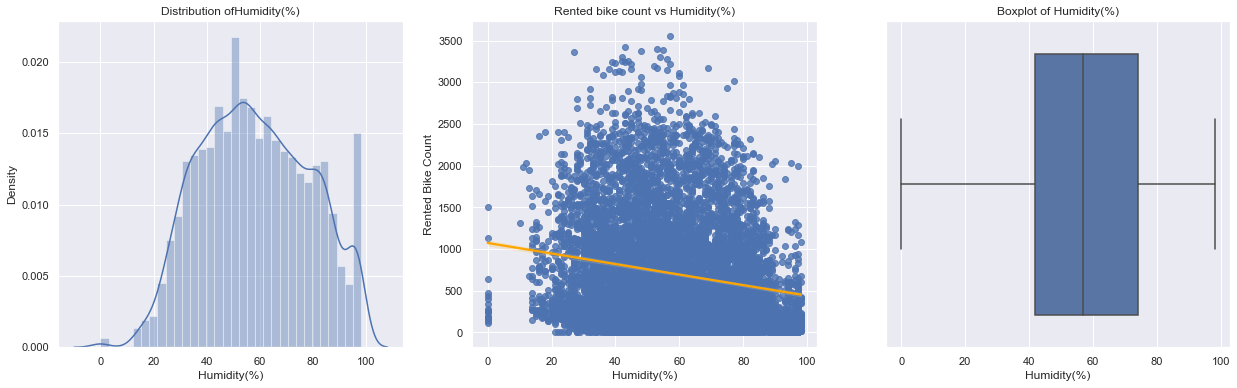

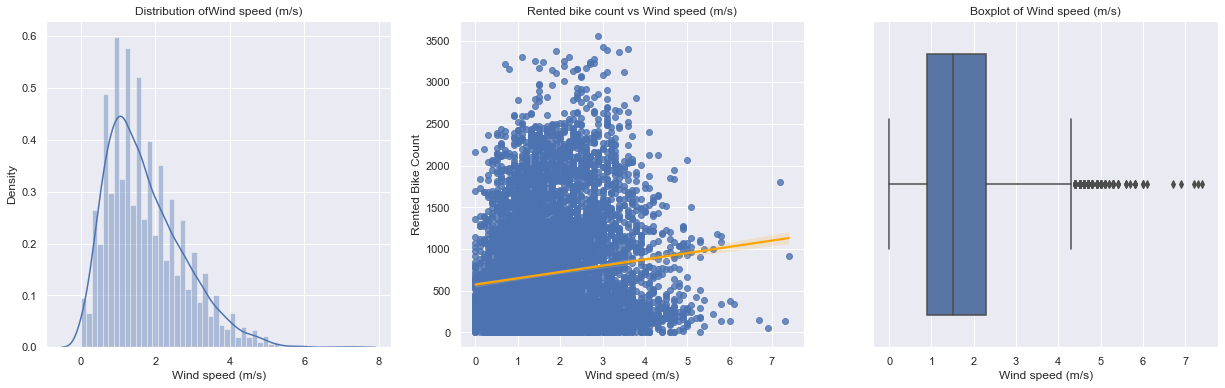

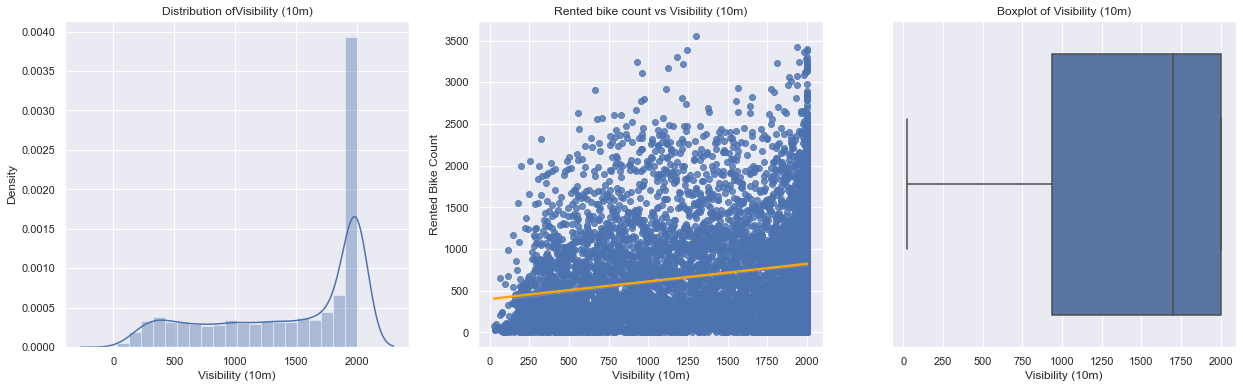

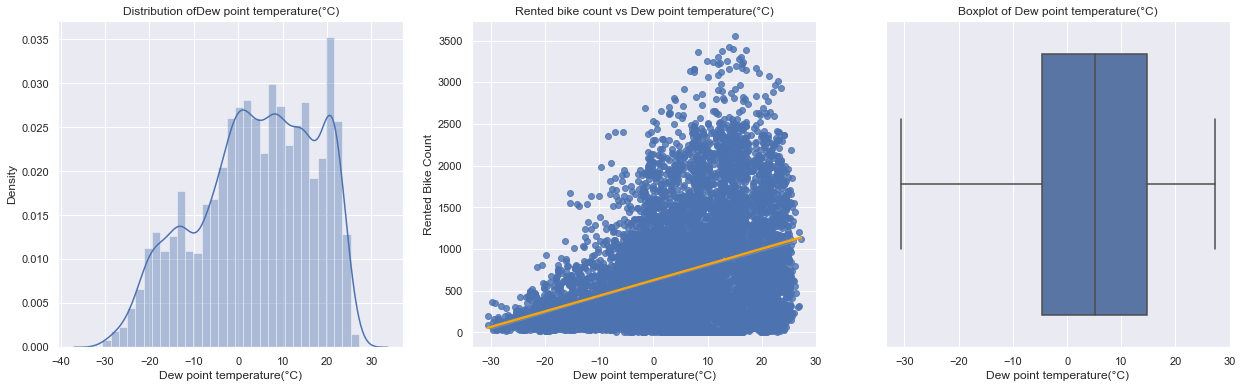

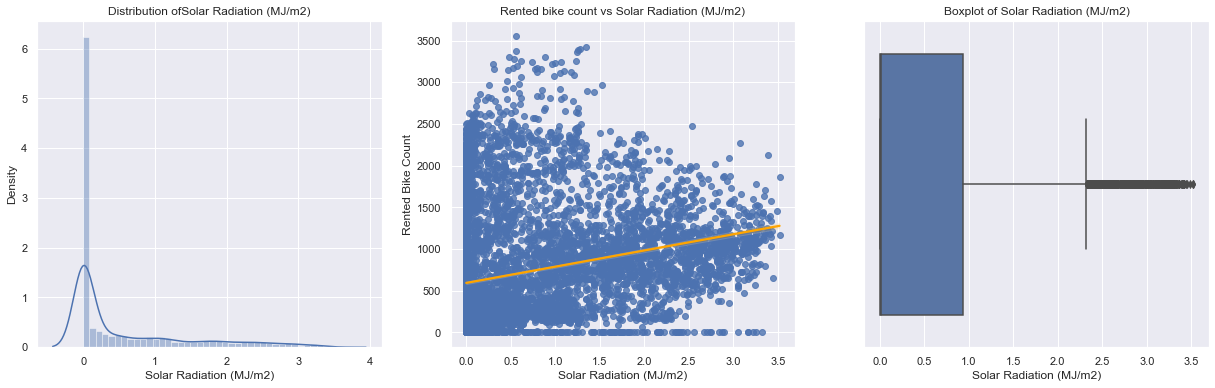

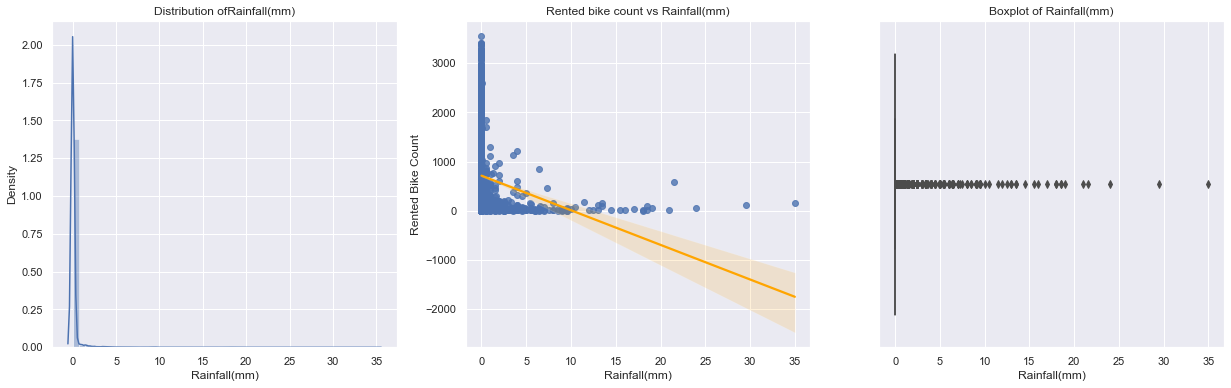

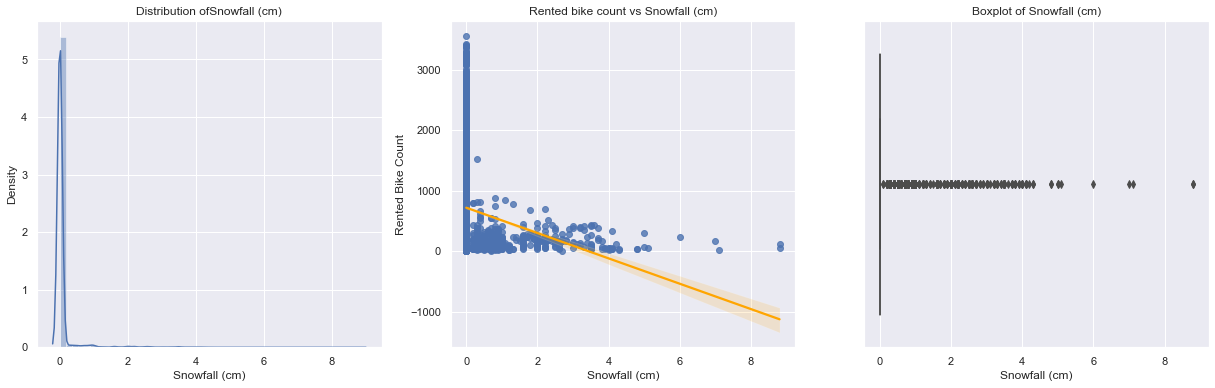

In [11]:
for col in list(continuous_variables.columns):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (21, 6))
        sns.distplot(seoul_bike_data[col], ax=ax1)
        sns.regplot(x = seoul_bike_data[col], y = seoul_bike_data['Rented Bike Count'], line_kws={'color': "orange"}, ax= ax2)
        sns.boxplot(seoul_bike_data[col], ax = ax3)
        ax1.set_title('Distribution of'+col)
        ax2.set_title('Rented bike count vs '+col)
        ax3.set_title('Boxplot of '+col)
        plt.show()


In [12]:
categorical_variables

,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes
...,...,...,...,...
8755,30/11/2018,Autumn,No Holiday,Yes
8756,30/11/2018,Autumn,No Holiday,Yes
8757,30/11/2018,Autumn,No Holiday,Yes
8758,30/11/2018,Autumn,No Holiday,Yes


In [13]:
categorical_variables_list = list(categorical_variables.columns)

In [14]:
categorical_variables_list.append('Hour')

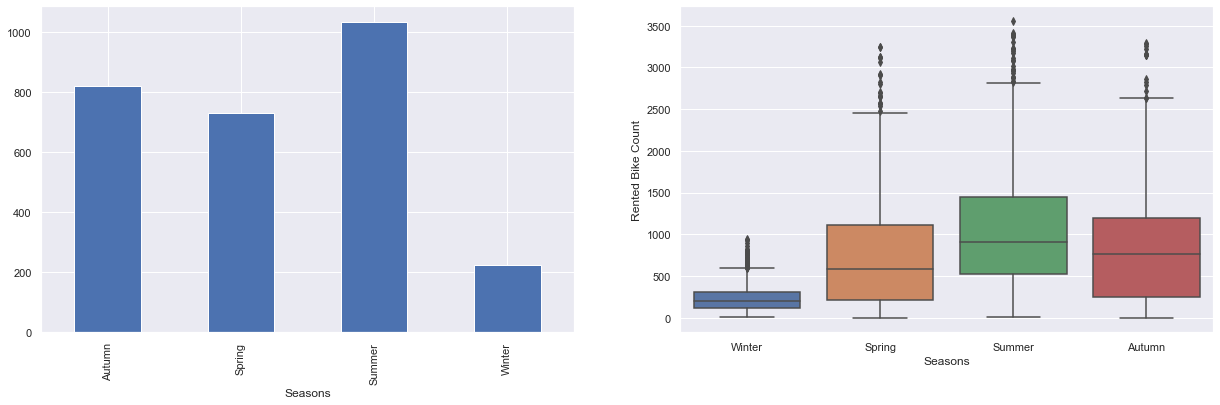

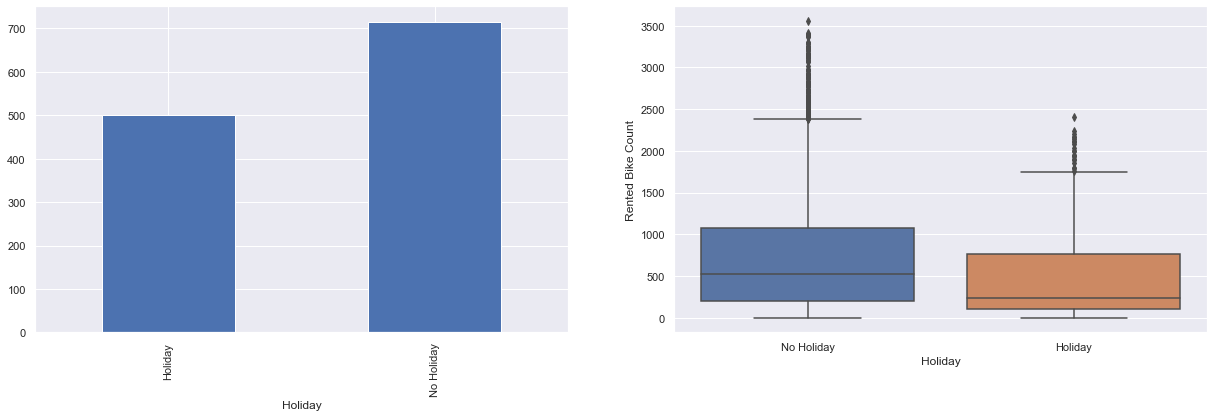

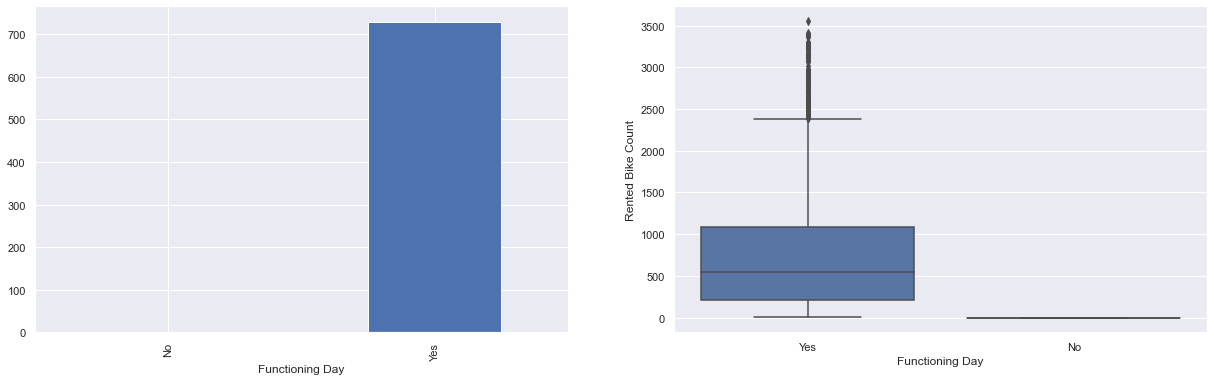

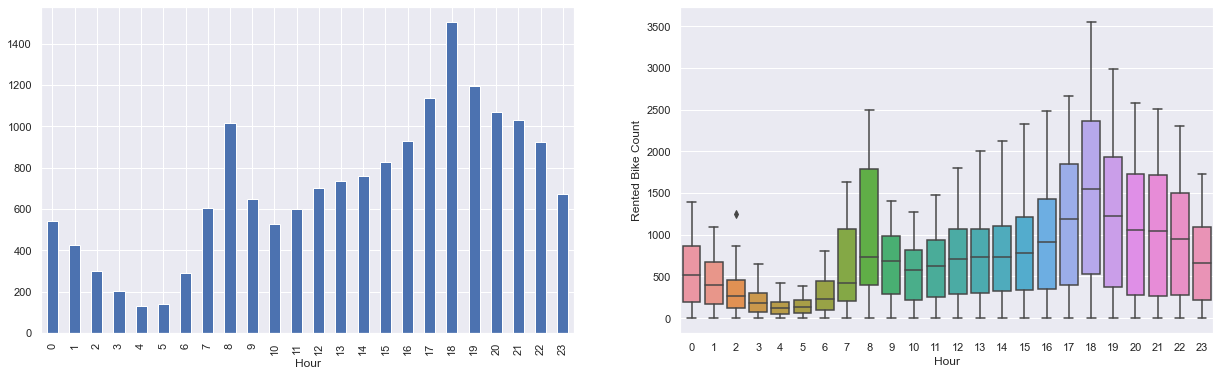

In [15]:
for col in categorical_variables_list:
    if col == 'Date':
        pass
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (21, 6))
        agg_data = seoul_bike_data.groupby(col)['Rented Bike Count'].mean()
        agg_data.plot(kind='bar', ax=ax1)
        sns.boxplot(x = seoul_bike_data[col], y=seoul_bike_data['Rented Bike Count'], ax=ax2)
        plt.show()

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [17]:
ohe = OneHotEncoder()
le = LabelEncoder()

In [18]:
categorical_variables

,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes
...,...,...,...,...
8755,30/11/2018,Autumn,No Holiday,Yes
8756,30/11/2018,Autumn,No Holiday,Yes
8757,30/11/2018,Autumn,No Holiday,Yes
8758,30/11/2018,Autumn,No Holiday,Yes


In [20]:
categorical_variables.drop(columns='Date', inplace=True)

In [22]:
categorical_variables

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [23]:
categorical_variables_encoded = pd.get_dummies(categorical_variables, drop_first=True)

In [24]:
continuous_variables

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
mnx = MinMaxScaler()

In [34]:
train_data = pd.concat([continuous_variables,categorical_variables_encoded], axis=1)

In [35]:
train_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,0,1,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,0,1,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,0,1,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,0,1,1


In [42]:
X = train_data.drop(columns = 'Rented Bike Count')
target = train_data['Rented Bike Count']

In [43]:
def standardized_normalized(data):
    df_col = data.columns
    data = mnx.fit_transform(data)
    data = std.fit_transform(data)
    return pd.DataFrame(data, columns=df_col)

In [44]:
trn_data = standardized_normalized(X)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate

In [46]:
ml_algo = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    LGBMRegressor()
]

In [49]:
ml_columns = ['MLAlgo Name', 'MLAlgo Parameters', 'MLAlgo Train MAE', 'MLAlgo Test MAE', 'MLAlgo Time']
ml_algo_compare = pd.DataFrame(columns=ml_columns)
ml_algo_predict = pd.DataFrame(target.copy().values, columns=['Actual Count'])

In [50]:
row_index = 0
for alg in ml_algo:
    MLAlgo_name = alg.__class__.__name__
    ml_algo_compare.loc[row_index, 'MLAlgo Name'] = MLAlgo_name
    ml_algo_compare.loc[row_index, 'MLAlgo Parameters'] = str(alg.get_params())
    cv_results = cross_validate(alg, trn_data, target, scoring = 'neg_mean_absolute_error', cv=3, return_train_score=True)
    ml_algo_compare.loc[row_index, 'MLAlgo Time'] = cv_results['fit_time'].mean()
    ml_algo_compare.loc[row_index, 'MLAlgo Train MAE'] = cv_results['train_score'].mean()
    ml_algo_compare.loc[row_index, 'MLAlgo Test MAE'] = cv_results['test_score'].mean()
    alg.fit(trn_data, target)
    ml_algo_predict[MLAlgo_name] = alg.predict(trn_data)
    row_index += 1

In [51]:
ml_algo_compare

,MLAlgo Name,MLAlgo Parameters,MLAlgo Train MAE,MLAlgo Test MAE,MLAlgo Time
0,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",-310.137822,-3553284779735786.5,0.009195
1,DecisionTreeRegressor,"{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_de...",0.0,-335.169521,0.058275
2,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",-51.133735,-299.802492,2.481542
3,XGBRegressor,"{'objective': 'reg:squarederror', 'base_score'...",-64.319376,-291.944119,0.705862
4,LGBMRegressor,"{'boosting_type': 'gbdt', 'class_weight': None...",-102.803169,-292.111281,0.153371


In [52]:
ml_algo_predict.sample(10)

,Actual Count,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,XGBRegressor,LGBMRegressor
6604,255,952.598417,255.0,226.33,299.264404,286.529528
5585,1011,1617.503287,1011.0,1055.25,1050.400635,1062.031885
3998,248,810.680076,248.0,260.86,211.136612,290.706216
4052,1386,1014.051340,1386.0,1467.06,1367.304077,1387.150755
623,156,574.522039,156.0,148.27,112.473526,138.402693
8538,1679,922.936955,1679.0,1526.62,1401.435425,1339.933858
2105,646,793.785508,646.0,611.97,782.445496,820.112567
5767,345,936.602695,345.0,617.52,754.256836,949.640702
6454,764,1044.540212,764.0,653.88,734.807556,766.967988
4999,1084,484.294382,1084.0,1014.35,980.086548,823.160088
